In [93]:
%run code-notes/library/_230210-0310_stats-library.ipynb

In [14]:
from pylib.anki.cards import Card
from pylib.anki.notes import Note

In [2]:
weight_factor = 0.50
rtag_filter_fn = lambda tag: tag.startswith('.feedback::trouble::')
ntag_filter_fn = lambda tag: tag.startswith('.Texts::CET::')

In [15]:
browser = aqt.dialogs._dialogs['Browser'][1]
table = browser.table
model = table._model

reviews = [model._state.get_review(item) for item in model._items]
cards = [model._state.get_card(item) for item in model._items]
notes = [model._state.get_note(item) for item in model._items]

In [85]:
card_ids = mw.col.find_cards('rtag:.feedback::trouble')

In [86]:
len(card_ids)

84

In [101]:
review_ids = set(model._state.review_ids_from_card_ids(card_ids))

In [31]:
review_ids = set(mw.col.find_reviews('rtag:.feedback::trouble'))

In [103]:
len(review_ids)

332

In [102]:
reviews = [mw.col.get_revlog_entry(review_id) for review_id in review_ids]

In [88]:
card_ids = set(review.cid for review in reviews)

In [89]:
len(card_ids)

84

In [90]:
cards = [Card(mw.col, id=card_id) for card_id in card_ids]

In [91]:
note_ids = set(card.nid for card in cards)

In [92]:
len(note_ids)

84

In [72]:
notes = [Note(mw.col, id=note_id) for note_id in note_ids]

In [41]:
len(reviews)

125

In [42]:
len(cards)

84

In [43]:
len(notes)

84

In [104]:
# Filter rtags.
rtags = get_tags(reviews, rtag_filter_fn)
# Filter ntags.
ntags = get_tags(notes, ntag_filter_fn)

In [105]:
len(rtags)

88

In [75]:
rtag_scores_dict = get_rtag_scorecards_for_cards(cards, rtag_filter_fn, weight_factor)

In [76]:
len(rtag_scores_dict)

84

In [77]:
empty_rtag_scores = {rtag:0 for rtag in rtags}

In [78]:
len(empty_rtag_scores)

88

In [79]:
data = {
    ntag: list(
        get_avg_rtag_scores_for_ntag(
            ntag,
            rtag_scores_dict,
            empty_rtag_scores,
        ).values()
    )
    for ntag in ntags
}


In [80]:
[(k, len(v)) for (k,v) in data.items()]

[('.Texts::CET::C07-TechniquesOfIntegration::CET-07.02-TrigonometricIntegrals',
  88),
 ('.Texts::CET::C07-TechniquesOfIntegration::CET-07.04-IntegrationOfRationalFunctionsByPartialIntegration',
  88),
 ('.Texts::CET::C04-ApplicationsOfDifferentiation', 88),
 ('.Texts::CET::C09-DifferentialEquations::CET-09.03-SeparableEquations', 88),
 ('.Texts::CET::C07-TechniquesOfIntegration::CET-07.01-IntegrationByParts',
  88),
 ('.Texts::CET::C03-DifferentiationRules::CET-03.10-LinearApproximationsAndDifferentials',
  88),
 ('.Texts::CET::C09-DifferentialEquations', 88),
 ('.Texts::CET::C00-DiagnosticTests::A-Algebra', 88),
 ('.Texts::CET::C00-DiagnosticTests', 88),
 ('.Texts::CET::C07-TechniquesOfIntegration', 88),
 ('.Texts::CET::C05-Integrals', 88),
 ('.Texts::CET::C07-TechniquesOfIntegration::CET-07.04-IntegrationOfRationalFunctionsByPartialFractions',
  88),
 ('.Texts::CET::C05-Integrals::CET-05.05-TheSubstitutionRule', 88),
 ('.Texts::CET::C07-TechniquesOfIntegration::CET-07.03-Trigonometr

In [81]:
df = pd.DataFrame(data)
df.index = empty_rtag_scores.keys()

In [46]:
list(filter(lambda x: x.startswith('.Texts::CET::C10-ParametricEquationsAndPolarCoordinates'), mw.col.tags.all()))

['.Texts::CET::C10-ParametricEquationsAndPolarCoordinates',
 '.Texts::CET::C10-ParametricEquationsAndPolarCoordinates::CET-10.01-CurvesDefinedByParametricEquations',
 '.Texts::CET::C10-ParametricEquationsAndPolarCoordinates::CET-10.02-CalculusWithParametricCurves',
 '.Texts::CET::C10-ParametricEquationsAndPolarCoordinates::CET-10.03-PolarCoordinates',
 '.Texts::CET::C10-ParametricEquationsAndPolarCoordinates::CET-10.04-AreasAndLengthsInPolarCoordinates',
 '.Texts::CET::C10-ParametricEquationsAndPolarCoordinates::CET-10.05-ConicSections',
 '.Texts::CET::C10-ParametricEquationsAndPolarCoordinates::CET-10.06-ConicSectionsInPolarCoordinates']

In [24]:
nt = cards[12].note().note_type()
nt

{'id': 1539794822805,
 'name': 'Randomized PWeave',
 'type': 0,
 'mod': 1677027404,
 'usn': 0,
 'sortf': 0,
 'did': 1535127937393,
 'tmpls': [{'name': 'Card 1',
   'ord': 0,
   'qfmt': "<script>\n  // Avoid redefining pseudorandom variable.\n  if (typeof pseudorandom === 'undefined') { let pseudorandom; }\n  if (`{{randomizer-Index:}}`.startsWith('Unknown field:')) {\n    // If custom field isn't available, default to zero.\n    pseudorandom = 0;\n  } else {\n    pseudorandom = {{randomizer-Index:}};\n  }\n\n  // Run JavaScript snippet from card to interpolate random\n  // params for displaying front and back sides.\n  {{Params}}\n\n  // Copy raw interpolated Front to div below.\n  document.getElementById('parameterized_front').innerHTML = String.raw`{{Front}}`;\n</script>\n\n<div id='parameterized_front'>\n  {{Front}}\n  <br>\n  (Warning: Front not yet defined by card template script.)\n</div>\n",
   'afmt': "{{FrontSide}}\n\n<hr id=answer>\n\n<script>\n  // Random seed and params hav

In [119]:
section_data = (
    (
        'Math::Calculus::Stewart; Calculus: Early Trancendentals::08 Further applications of integration::08.04 Applications to economics and biology',
        (
            '.Texts::CET::C08-FurtherApplicationsOfIntegration',
            '.Texts::CET::C08-FurtherApplicationsOfIntegration::CET-08.04-ApplicationsToEconomicsAndBiology',
        ),
        8,4,23,
    ),
    (
        'Math::Calculus::Stewart; Calculus: Early Trancendentals::08 Further applications of integration::08.05 Probability',
        (
            '.Texts::CET::C08-FurtherApplicationsOfIntegration',
            '.Texts::CET::C08-FurtherApplicationsOfIntegration::CET-08.05-Probability',
        ),
        8,5,21,
    ),
)
base_tags = [
    '.Texts',
    '.Texts::CET',
    'Calculus',
    'Math',
]
note_name_fmt = 'CET-{c:02d}.{s:02d}-{n:02d} Exercise:'

In [122]:
def generate_problems_for(section_name, section_tags, chapter_num, section_num, num_problems, note_type_dict, base_tags):
    did = mw.col.decks.id_for_name(section_name)
    if did is None:
        deck = mw.col.decks.add_normal_deck_with_name(section_name)
        did = mw.col.decks.id_for_name(section_name)
    for i in range(1, num_problems + 1):
        note = mw.col.new_note(note_type_dict)
        note['Front'] = note_name_fmt.format(c=chapter_num, s=section_num, n=i)
        note.tags.extend(base_tags)
        note.tags.extend(section_tags)
        print(did, note['Front'])
        mw.col.add_note(note, did)    

In [123]:
for (section_name, section_tags, chapter_num, section_num, num_problems) in section_data:
    generate_problems_for(section_name, section_tags, chapter_num, section_num, num_problems, nt, base_tags)

1677717408710 CET-08.04-01 Exercise:
1677717408710 CET-08.04-02 Exercise:
1677717408710 CET-08.04-03 Exercise:
1677717408710 CET-08.04-04 Exercise:
1677717408710 CET-08.04-05 Exercise:
1677717408710 CET-08.04-06 Exercise:
1677717408710 CET-08.04-07 Exercise:
1677717408710 CET-08.04-08 Exercise:
1677717408710 CET-08.04-09 Exercise:
1677717408710 CET-08.04-10 Exercise:
1677717408710 CET-08.04-11 Exercise:
1677717408710 CET-08.04-12 Exercise:
1677717408710 CET-08.04-13 Exercise:
1677717408710 CET-08.04-14 Exercise:
1677717408710 CET-08.04-15 Exercise:
1677717408710 CET-08.04-16 Exercise:
1677717408710 CET-08.04-17 Exercise:
1677717408710 CET-08.04-18 Exercise:
1677717408710 CET-08.04-19 Exercise:
1677717408710 CET-08.04-20 Exercise:
1677717408710 CET-08.04-21 Exercise:
1677717408710 CET-08.04-22 Exercise:
1677717408710 CET-08.04-23 Exercise:
1677717408732 CET-08.05-01 Exercise:
1677717408732 CET-08.05-02 Exercise:
1677717408732 CET-08.05-03 Exercise:
1677717408732 CET-08.05-04 Exercise:
1

In [315]:
(1/50)*(2560)/(0.017185)*(sy.exp(0.017185 * 50) - 1)

4056.04400163553

In [322]:
xs = list(range(1,11))
ys = [sum(12/(-5)**i for i in range(1, n+1)) for n in xs]

In [323]:
ys

[-2.4,
 -1.92,
 -2.016,
 -1.9968,
 -2.0006399999999998,
 -1.9998719999999996,
 -2.0000256,
 -1.9999948799999998,
 -2.000001024,
 -1.9999997952]

In [324]:
from matplotlib import pyplot as plt

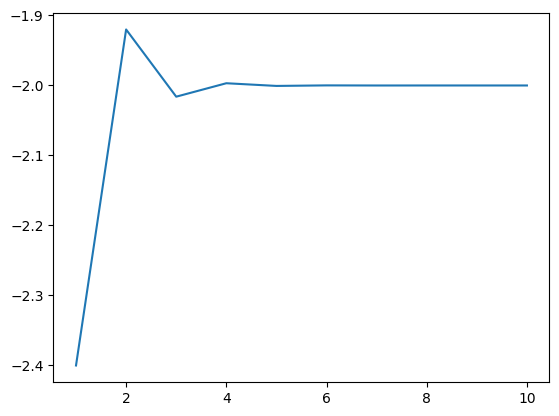

In [326]:
plt.plot(xs, ys)

In [1]:
import sympy as sy

In [3]:
x,y = sy.symbols('x,y')

/mnt/Work/Repos/kaben/ankimath/out/pyenv/lib/python3.9/site-packages/matplotlib/_mathtext.py:1871: UserWarning: warn_name_set_on_empty_Forward: setting results name 'sym' on Forward expression that has no contained expression
  - p.placeable("sym"))
/mnt/Work/Repos/kaben/ankimath/out/pyenv/lib/python3.9/site-packages/matplotlib/_mathtext.py:1876: UserWarning: warn_ungrouped_named_tokens_in_collection: setting results name 'name' on ZeroOrMore expression collides with 'name' on contained expression
  "{" + ZeroOrMore(p.simple | p.unknown_symbol)("name") + "}")


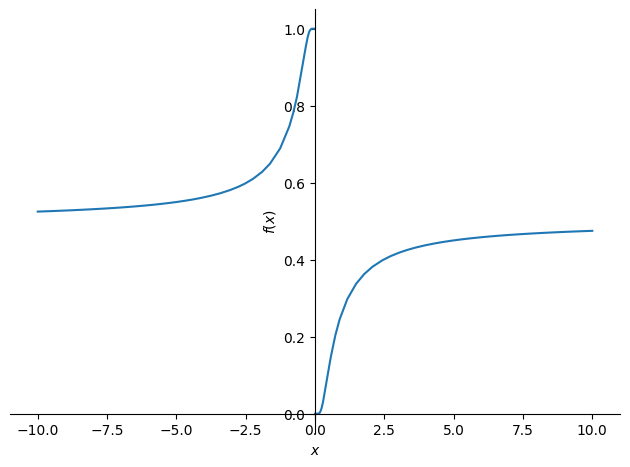

1684778666.914 GET /_anki/css/toolbar.css
1684778666.916 GET /_anki/css/toolbar-bottom.css


In [4]:
sy.plot(1/(1 + sy.exp(1/x)))

In [14]:
def _f(x): return x**3 - 3*x + 4

In [17]:
2-0.2/9, 2+0.2/9

(1.9777777777777779, 2.022222222222222)

In [21]:
2-0.1/9, 2+0.1/9

(1.988888888888889, 2.011111111111111)

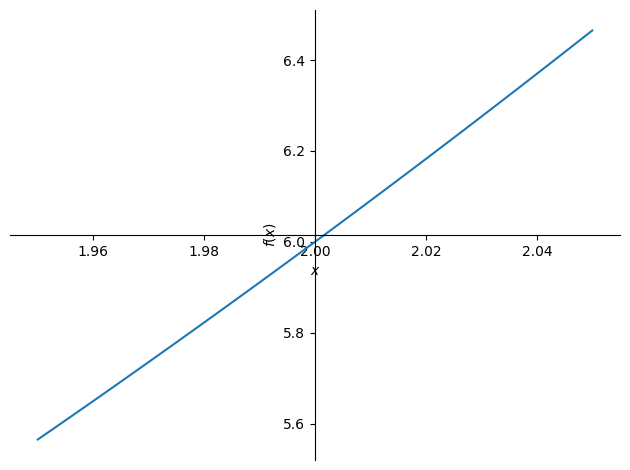

In [19]:
sy.plot(_f(x), (x, 1.95, 2.05))

In [24]:
_f(1.98), _f(2.02)

(5.822392000000001, 6.182408000000001)

In [25]:
_f(1.99), _f(2.01)

(5.910599, 6.090600999999998)

In [10]:
def _f(x): return (sy.exp(2*x) - 1)/x

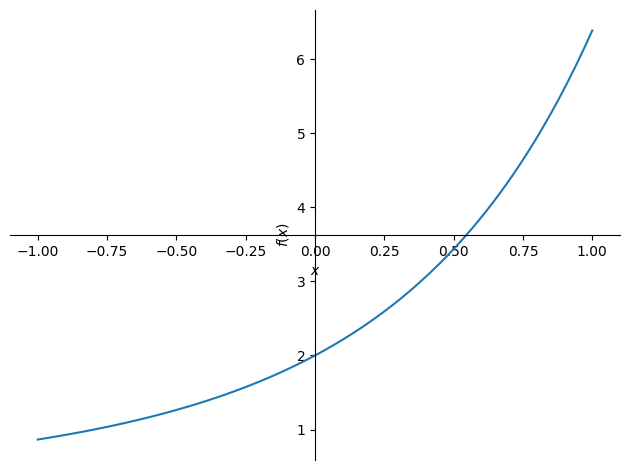

In [11]:
sy.plot(_f(x), (x, -1, 1))

In [31]:
d = dict(
    fubar = 'fubaz',
    blah = 'zzz',
)
fmt1 = '{fubar} {{blah}}'
msg1 = fmt1.format(**d)
msg1

'fubaz {blah}'

In [34]:
h = float((6*27/sy.pi)**(1/3))
h

3.7221029453964

In [35]:
r = float((3*27/(sy.pi*h))**(1/2))
r

2.6319242329642165

In [36]:
float(sy.pi * r**2 * h / 3)

27.0

In [38]:
float((3*27*sy.pi - 18*27**2/h**3 * sy.pi*r*(r**2 + h**2)**(1/2)))

-9337.155248863952

In [39]:
def f(x): return x**3 - x - 1
def f_1(x): return 3*x**2 - 1

In [58]:
x_n = 0.57

In [93]:
x_n = x_n - f(x_n)/f_1(x_n)
x_n

1.3247179572459706

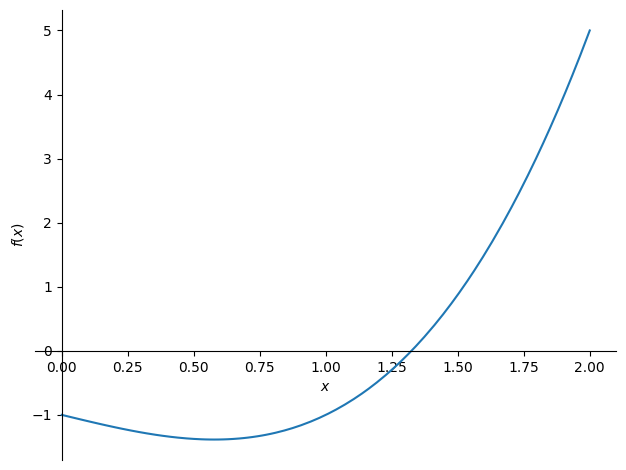

In [94]:
sy.plot(f(x), (x, 0, 2))

In [95]:
(1/3)**0.5

0.5773502691896257

1684980011.329 GET /_anki/js/vendor/jquery.min.js
1684980011.330 GET /_anki/css/webview.css
1685028011.330 GET /_anki/js/vendor/jquery.min.js


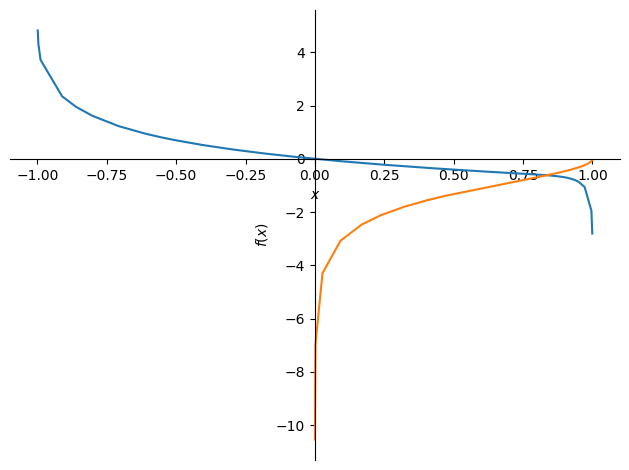

1685110211.285 GET /_anki/js/deckbrowser.js
1685110211.287 GET /_anki/js/vendor/jquery-ui.min.js


In [98]:
sy.plot(-sy.ln((1 + x)/sy.sqrt(1 - x**22)), -sy.ln((1 + sy.sqrt(1 - x**2))/x))

In [99]:
from fractions import Fraction

In [101]:
a,b,c,d,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,theta = sy.symbols(
    'a,b,c,d,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,theta'
)

In [6]:
!ag filtered code-notes

code-notes/230109-1542_scheduler-investigation.ipynb
976:      "  filtered {\n",
996:      "  filtered {\n",
1015:      "  filtered {\n",

code-notes/230114-1200_transfer-study-notes.ipynb
1109:      "***** SchedulerService.answer_card(input=CardAnswer { card_id: 1605841841781, current_state: Some(SchedulingState { custom_data: None, value: Some(Filtered(Filtered { value: Some(Rescheduling(ReschedulingFilter { original_state: Some(Normal { value: Some(Relearning(Relearning { review: Some(Review { scheduled_days: 1, elapsed_days: 1, ease_factor: 2.3, lapses: 1, leeched: false }), learning: Some(Learning { remaining_steps: 1, scheduled_secs: 600 }) })) }) })) })) }), new_state: Some(SchedulingState { custom_data: None, value: Some(Filtered(Filtered { value: Some(Rescheduling(ReschedulingFilter { original_state: Some(Normal { value: Some(Relearning(Relearning { review: Some(Review { scheduled_days: 1, elapsed_days: 0, ease_factor: 2.3, lapses: 1, leeched: false }), learning: Some(Learning

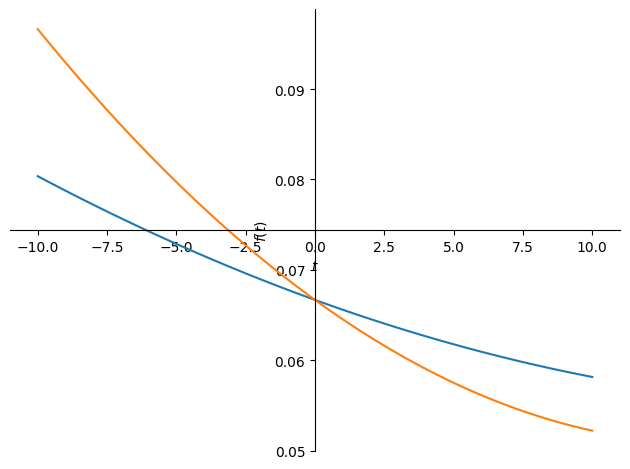

In [102]:
def f(t):
    return Fraction(1, 15) - t/450

def g(t):
    return (t**2)/12900

def C(t):
    return sy.Integral(f(s) + g(s), (s, 0, t))/t

sy.plot(C(t), f(t) + g(t))